# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('YOUR_DATA')
except:
    data = pd.read_csv('YOUR_DATA')

display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

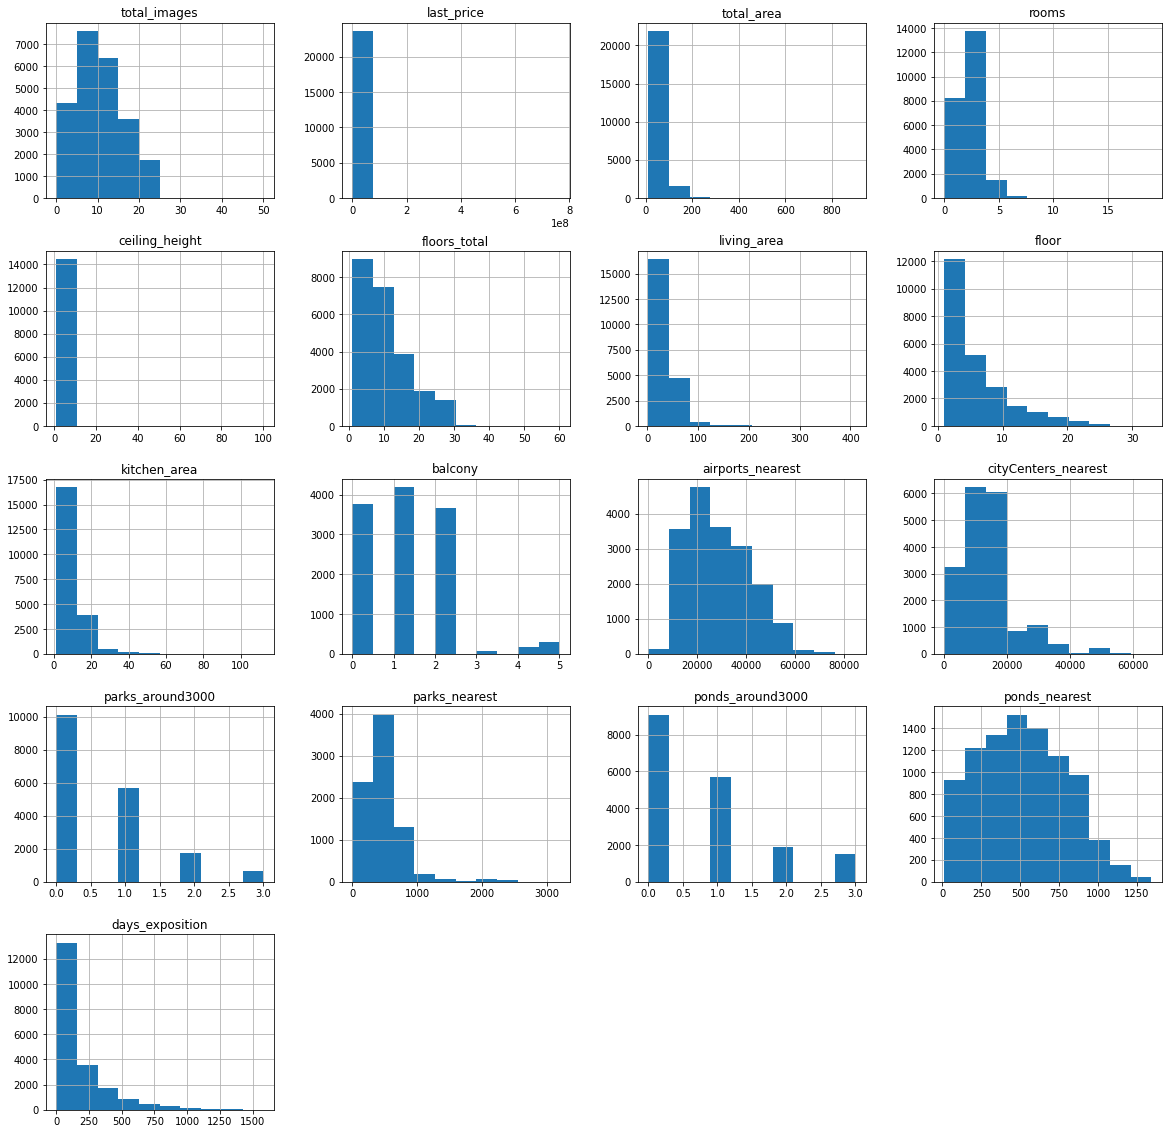

In [3]:
data.hist(figsize=(20, 20))
plt.show()

-Вывод на основе полученных данных:

    last_price: минимальная цена квартиры 12190 руб., для Санкт-Петербурга очень дешево, 
    да и не только для СПб. Максимальная цена 763 000 000 руб. очень высокая, 
    но для для каких-нибудь объектов возможна. 

    rooms: минимальное число комнат 0 это ошибка или студии, возможно по ошибке есть другие объекты.

    ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров это ошибка, слишком высокие.

    floors_total: максимальное количество этажей 60 это ошибка, слишком высокое.

    living_area: минимальная жилая площадь 2 м² слишком маленькая это ошибка.

    kitchen_area: минимальная площадь кухни 1,3 м² слишком маленькая это ошибка.

    airports_nearest: минимальное расстояние до аэропорта 0 м это ошибка.

    days_exposition: минимальное количество дней размещения объявления - 1. 
    Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, 
    но, если таких объявлений много, то такие данные могут негативно влиять на среднее. 
    Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

### Выполните предобработку данных

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height'] / 10

data = data.dropna(subset=['floors_total'])

for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['locality_name'] == t), 'living_area'].median()
data[data['living_area'] >= 9.0]
data = data[data['living_area'] != 0]

for k in data['locality_name'].unique():
    data.loc[(data['locality_name'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == k), 'kitchen_area'].median()
data = data[data['kitchen_area'] != 0]

data['is_apartment'] = data['is_apartment'].fillna(False).astype('boolean')

data['balcony'] = data['balcony'].fillna(0).astype('int')

data['locality_name'] = (
    data['locality_name']
    .str.lower()
    .str.replace('ё','е')
    .replace(['поселок ', 'коттеджный ', 'имени ', 'платформа ', 'пансионат ', 'садовое товарищество ', 'станции ', 
              'село ', 'садоводческое некоммерческое товарищество ', 'городского типа ', 'деревня ', 
              'городской поселок ','при железнодорожной станции ', 'городской '], '', regex=True)
)
data['locality_name'] = data['locality_name'].fillna('unknown')

data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int')
data = data[data['rooms'] <= 8]
print(data.isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                22
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               28
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15564
ponds_around3000         5508
ponds_nearest               0
days_exposition          3166
dtype: int64


In [5]:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

-Вывод по выполненной работе:

    1. Преобразованны типы данных:

        floors_total приведен к типу int
        is_apartment приведен к типу boolean
        balcony приведен к типу int
        parks_around3000 приведен к типу int
        ponds_nearest приведен к типу int
        days_exposition приведен к типу int

    2. Очищены данные:

        Столбец locality_name приведен к нижнему регистру, очищен от лишних слов,
        и пропуски удалены

### Добавьте в таблицу новые столбцы

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: distance_to_center, Length: 23594, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqrm,publication_day,publication_month,publication_year,floor_type,distance_to_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,31.30,9,False,...,84.0,3.0,234,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,0,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,0,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,31.30,22,False,...,NaN,0.0,0,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,0,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,0,289.0,88524.59,6,2,2017,другой,15.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23594 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23594 non-null  int64         
 1   last_price            23594 non-null  float64       
 2   total_area            23594 non-null  float64       
 3   first_day_exposition  23594 non-null  datetime64[ns]
 4   rooms                 23594 non-null  int64         
 5   ceiling_height        23594 non-null  float64       
 6   floors_total          23594 non-null  float64       
 7   living_area           23572 non-null  float64       
 8   floor                 23594 non-null  int64         
 9   is_apartment          23594 non-null  boolean       
 10  studio                23594 non-null  bool          
 11  open_plan             23594 non-null  bool          
 12  kitchen_area          23566 non-null  float64       
 13  balcony         

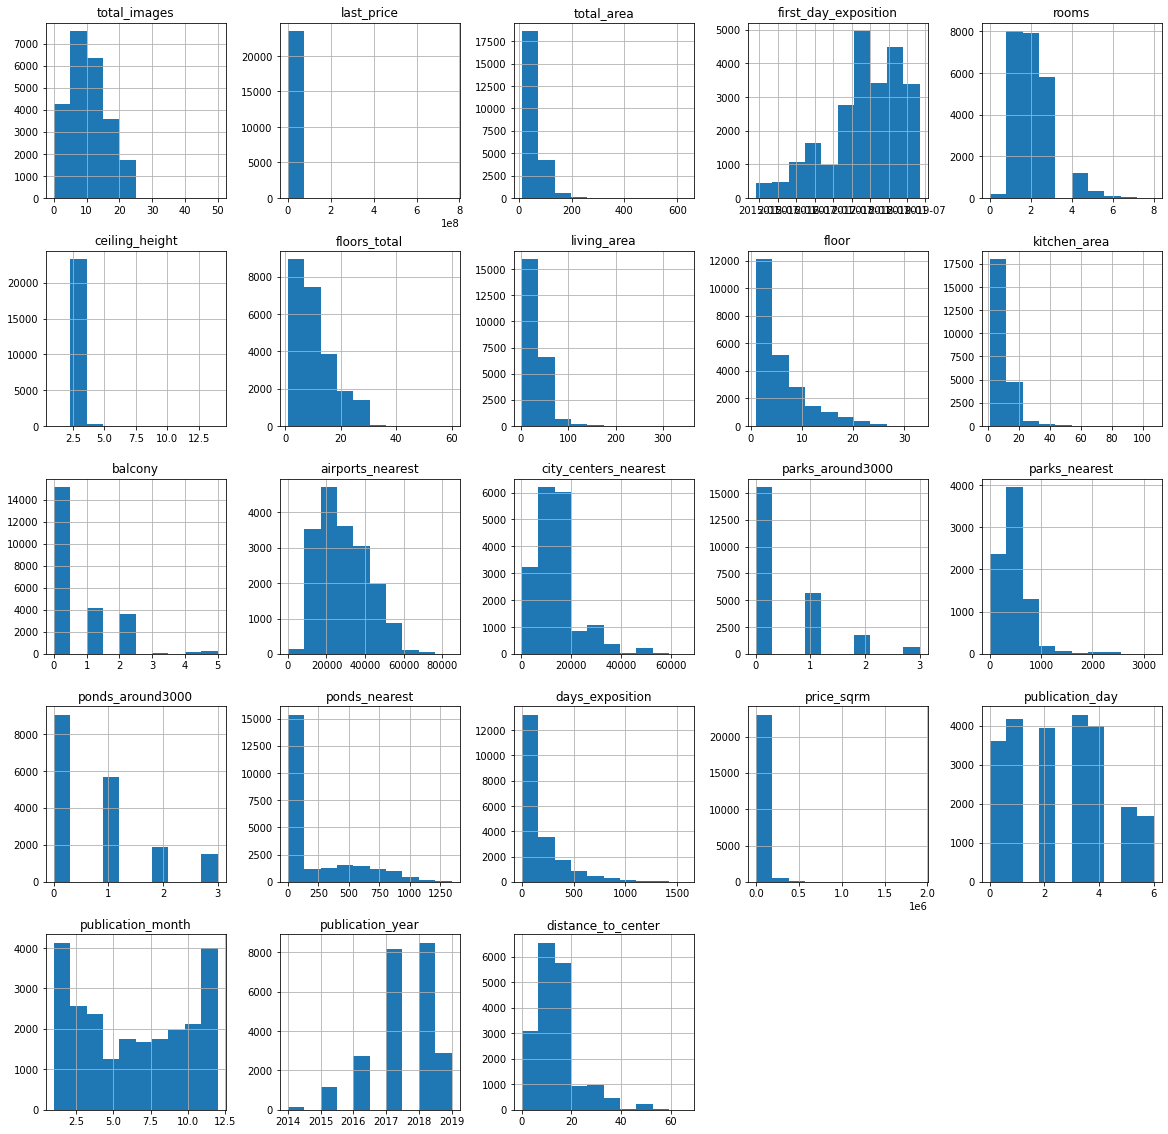

In [6]:
data['price_sqrm'] = (data['last_price'] / data['total_area']).round(2)
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
def get_floor_type(data_row):
    floor_number = data_row['floor']
    if floor_number == 1:
        return 'первый'
    elif floor_number == data_row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(get_floor_type, axis=1)
data['distance_to_center'] = (data['city_centers_nearest'] / 1000).round()
print(data['distance_to_center'])
display(data.head(10))
data.info()
print(data.describe())
data.hist(figsize=(20, 20))
plt.show()

-Добавлены новые столбцы:

    publication_day - день публикации объекта
    publication_month - месяц публикации объекта
    publication_year - год публикации объекта
    floor_type - тип этажа объекта, всего их три(первый, последний, другой)
    distance_to_center - расстояние до центра в километрах
   

### Проведите исследовательский анализ данных

count    23594.000000
mean        60.120248
std         34.502295
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64


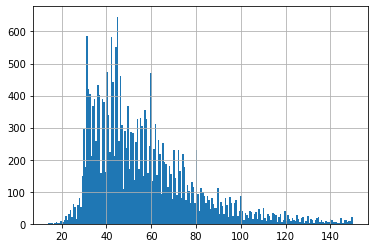

In [ ]:
data['total_area'].hist(range=(14, 150), bins=200)
print(data['total_area'].describe())

Из графика видно, что больше всего квартир с площадью 35-60 квадратных метров, пик предложения находится примерно на 42 квадратных метров

count    23572.000000
mean        33.948159
std         20.584045
min          2.000000
25%         19.000000
50%         30.400000
75%         41.100000
max        347.500000
Name: living_area, dtype: float64


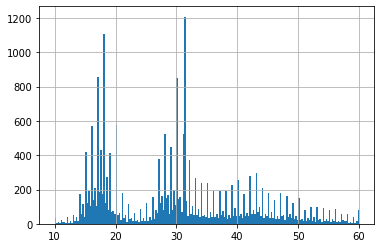

In [8]:
data['living_area'].hist(range=(10, 60), bins=200)
print(data['living_area'].describe())

Из графика видно, что больше всего квартир с площадью 14-20, 27-32 квадратных метров, пик предложения находится примерно на 18 квадратных метров

count    23566.000000
mean        10.449040
std          5.559155
min          1.300000
25%          7.200000
50%          9.600000
75%         11.410000
max        107.000000
Name: kitchen_area, dtype: float64


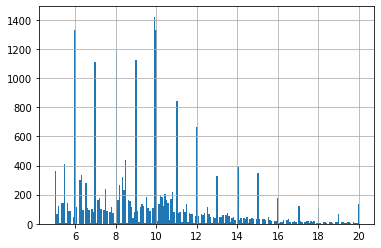

In [9]:
data['kitchen_area'].hist(range=(5, 20), bins=200)
print(data['kitchen_area'].describe())

Из графика видно, что больше всего квартир с площадью 6-10 квадратных метров, пик предложения находится примерно на 6 и 10 квадратных метров

count    2.359400e+04
mean     6.503370e+06
std      1.053284e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.640000e+06
75%      6.768348e+06
max      7.630000e+08
Name: last_price, dtype: float64


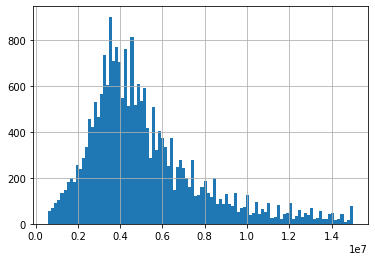

In [10]:
data['last_price'].hist(range=(600000, 15000000), bins=100)
print(data['last_price'].describe())

Из графика видно, что больше всего квартир с ценой 3-5.7 миллионов рублей, пик предложения находится примерно на 3.8 миллиона рублей

count    23594.000000
mean         2.063745
std          1.043579
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


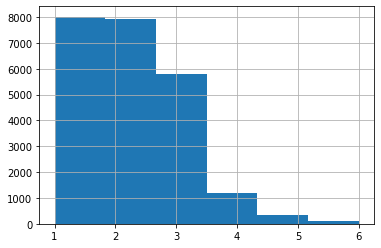

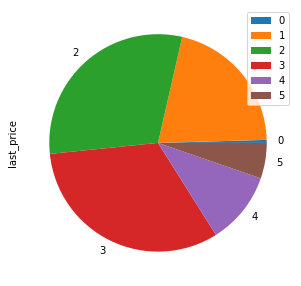

In [11]:
data['rooms'].hist(range=(1, 6), bins=6)
data.groupby(['rooms']).sum().head(6).plot(y='last_price', kind='pie', figsize=(5, 5))
print(data['rooms'].describe())

Из графика и диаграммы видно, что больше всего квартир с одной или двумя комнатами

count    23594.000000
mean         2.698544
std          0.253373
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


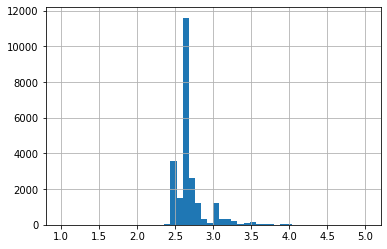

In [12]:
data['ceiling_height'].hist(range=(1, 5), bins=50)
print(data['ceiling_height'].describe())

 Из графика видно, что больше всего квартир с высотой потолков равные 2.5 - 3 метра, пик предложения 2.7 метра

count      23594
unique         3
top       другой
freq       17353
Name: floor_type, dtype: object


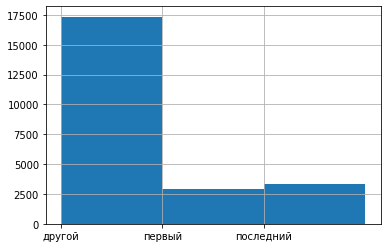

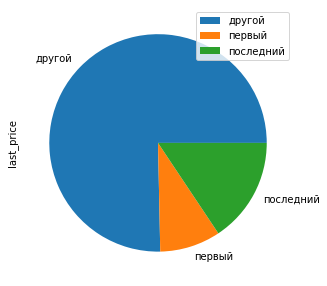

In [13]:
data['floor_type'].hist(range=(0, 3), bins=3)
data.groupby(['floor_type']).sum().plot(y='last_price', kind='pie', figsize=(5, 5))
print(data['floor_type'].describe())

Из графика и диаграммы видно, что больше всего квартир продается с типом этажа 'другой'(ну логично)

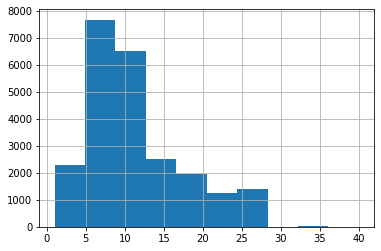

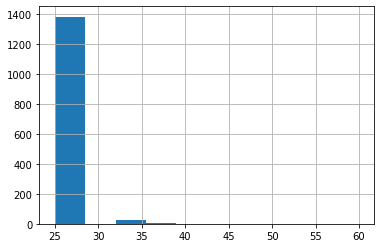

count    23594.000000
mean        10.677545
std          6.597205
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [14]:
data['floors_total'].hist(range=(1, 40), bins=10)
plt.show()
data['floors_total'].hist(range=(25, 60), bins=10)
plt.show()
print(data['floors_total'].describe())

На графике видно, что больше квартир продается в пятиэтажных домах

count    18085.000000
mean     14193.009179
std       8614.247420
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


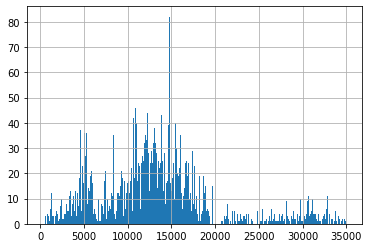

In [15]:
data['city_centers_nearest'].hist(range=(200, 35000), bins=2000)
print(data['city_centers_nearest'].describe())

На графике видно, что больше квартир продается с удаленностью от центра 11000-16000 метров

count    8030.000000
mean      490.726027
std       341.558147
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


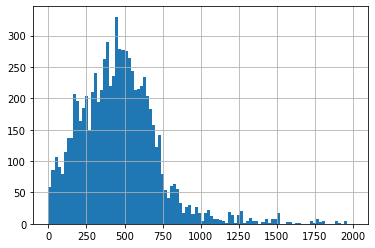

In [16]:
data['parks_nearest'].hist(range=(0, 2000), bins=100)
print(data['parks_nearest'].describe())

На графике видно, что больше квартир продается с удаленностью от парка 180-740 метров

count    20428.000000
mean       180.761700
std        219.473125
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Медиана равна 95
Средняя равна 180


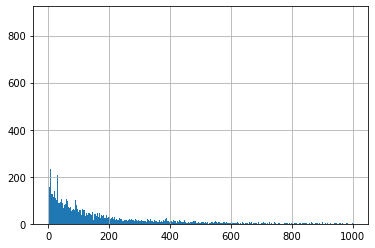

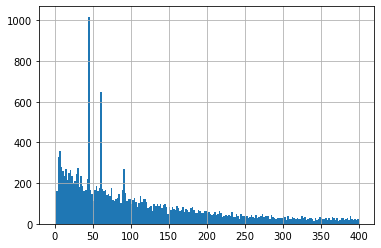

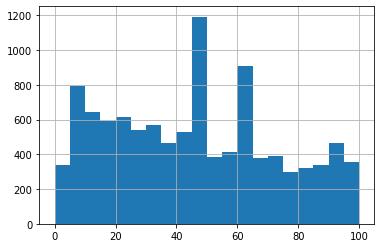

In [17]:
#4.2
print(data['days_exposition'].describe())
print(f"Медиана равна {data['days_exposition'].median().astype('int')}")
print(f"Средняя равна {data['days_exposition'].mean().astype('int')}")
data['days_exposition'].hist(range=(0, 1000), bins=1000)
plt.show()
data['days_exposition'].hist(range=(0, 400), bins=200)
plt.show()
data['days_exposition'].hist(range=(0, 100), bins=20)
plt.show()

    В среднем продажа квартир занимает пол года, это, конечно, много, но данных много, поэтому так получается, по медиане продажа квартир занимает 102 дня, это уже похоже на правду и основная масса продаж из этих 102 дней приходится примерно на 60-65 дней. Быстрой можно считать такую продажу, которая произошла до 90-100 дней, долгую, которая произошла через год и более, после года продаж намного меньше, основная масса продаж находится до года.

Коэффициент корреляции равен 0.64


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

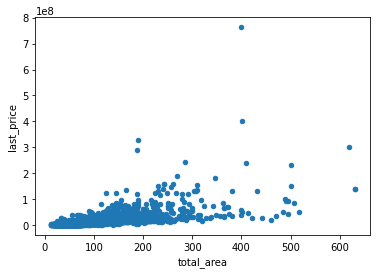

In [ ]:
print(f'Коэффициент корреляции равен', data['total_area'].corr(data['last_price']).round(2))
data.plot(x='total_area', y='last_price', kind='scatter')

Исходя из коэффициента корреляции можно сказать, что площадь умеренно влияет на цену объекта, 
видна зависимость цены от площади объекта

Коэффициент корреляции равен 0.53


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

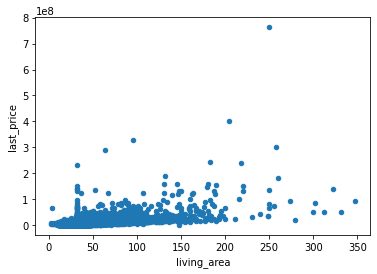

In [19]:
print(f'Коэффициент корреляции равен', data['living_area'].corr(data['last_price']).round(2))
data.plot(x='living_area', y='last_price', kind='scatter')

Жилая площадь также имеет умеренное влияние на цену объекта

Коэффициент корреляции равен 0.43


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

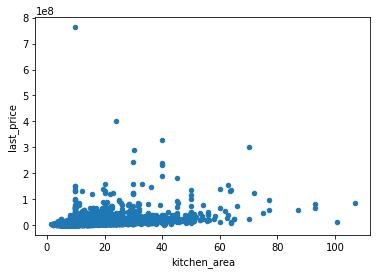

In [20]:
print(f'Коэффициент корреляции равен', data['kitchen_area'].corr(data['last_price']).round(2))
data.plot(x='kitchen_area', y='last_price', kind='scatter')

Площадь кухни тоже имеет влияние на цену, в целом, вся площадь имеет влияние на цену

Коэффициент корреляции равен 0.36


<AxesSubplot:xlabel='rooms'>

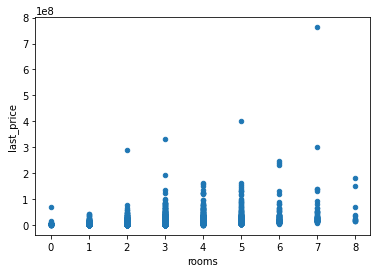

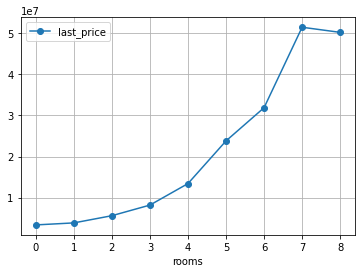

In [21]:
print(f'Коэффициент корреляции равен', data['rooms'].corr(data['last_price']).round(2))
data.plot(x='rooms', y='last_price', kind='scatter')
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-')

На графике видна зависимость цены объекта от количества комнат, можно сказать, что влияние есть, хоть и не такое большое

<AxesSubplot:xlabel='floor_type'>

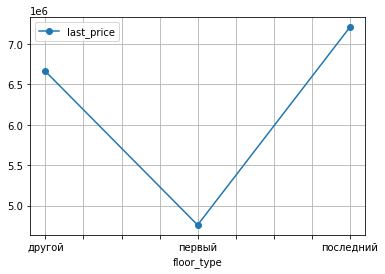

In [22]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-')

Исходя из графика, можно сказать что на первом этаже самые дешевые квартиры относительно других

Коэффициент корреляции равен 0.0


<AxesSubplot:xlabel='publication_day'>

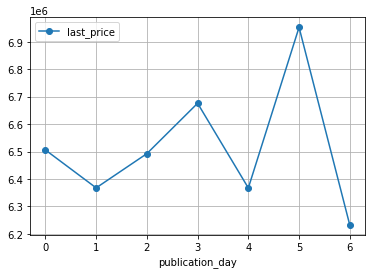

In [23]:
#publication_day    publication_month     publication_year
print(f'Коэффициент корреляции равен', data['publication_day'].corr(data['last_price']).round(2))
data.pivot_table(index='publication_day', values='last_price').plot(grid=True, style='o-')

Из этого графика ничего нельзя сказать, взаимосвязи никакой нет

Коэффициент корреляции равен 0.0


<AxesSubplot:xlabel='publication_month'>

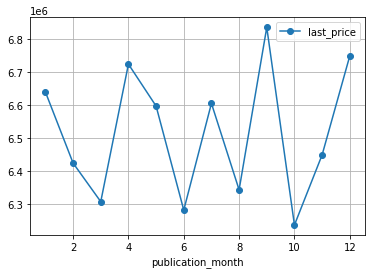

In [24]:
print(f'Коэффициент корреляции равен', data['publication_month'].corr(data['last_price']).round(2))
data.pivot_table(index='publication_month', values='last_price').plot(grid=True, style='o-')

Взаимосвзяи также никакой нет, но квартиры в декабре действительно всегда поднимаются в цене

Коэффициент корреляции равен -0.04


<AxesSubplot:xlabel='publication_year'>

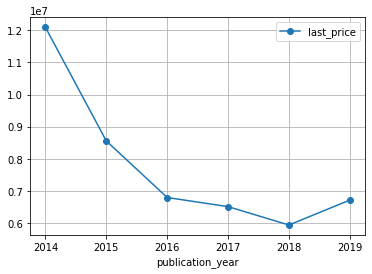

In [25]:
print(f'Коэффициент корреляции равен', data['publication_year'].corr(data['last_price']).round(2))
data.pivot_table(index='publication_year', values='last_price').plot(grid=True, style='o-')

Коэффициент корреляции говорит о том, что зависимости нет, но по графику видна тенденция уменьшения цены на объект недвижимости

***Общий вывод по 4.3 заданию***

    -Факторы влияющие на цену:
        Площадь объекта имеет самое большое влияние
        Количество комнат
        Тип этажа тоже имеет влияние - первый будет точно дешевле
        
    -Факторы не влияющие на цену:
        День, месяц, год, в который было выложено объявление, разве что год имеет
        нисходящую тенденцию, но для будущего это мало что значит

In [ ]:
median_price = (
    data.pivot_table(index='locality_name', values='price_sqrm', aggfunc=['count', 'median'])
    .sort_values(by=('count', 'price_sqrm'), ascending=False).head(10)
)

display(median_price)

,count,median
,price_sqrm,price_sqrm
locality_name,,
санкт-петербург,15632,104794.200
мурино,586,86250.375
кудрово,470,95555.315
шушары,439,76829.270
всеволожск,398,65789.470
пушкин,369,100000.000
колпино,338,74723.745
парголово,327,91642.860


    Стоимость квадратного метра выше всего в Санкт-Петербурге и его ближайших пригородах,
    низкие цены на недвижимость наблюдаются в более удаленных от города локациях, развитая инфраструктура 
    и зеленые зоны могут влиять на рост цен на жилье, численность населения также может играть роль в 
    формировании стоимости одного квадратного метра


<AxesSubplot:xlabel='distance_to_center'>

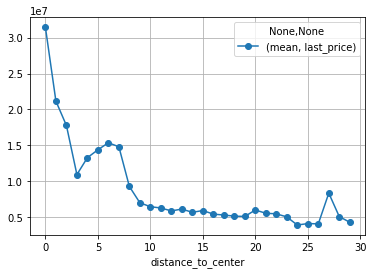

In [ ]:
(
data[data['locality_name'] == 'санкт-петербург']
    .pivot_table(index='distance_to_center', values=['last_price'], aggfunc=['mean'])
    .plot(grid=True, style='o-')
)

На графике видна явная зависимость цены от расстояния до центра, самые дорогие объекты находятся в центре и близь него, чем дальше от центра тем дешевле жилье

### Напишите общий вывод

#### **Во время исследования объявлений о продаже квартир, данные были обработаны: заполнены пропуски и удалены дубликаты, были добавлены новые столбцы. По итогам можно сделать следующие выводы:**

*-Параметры ликвидной квартиры:*

    Общая площадь - 35-60 квадратных метров
    Цена объекта - 3-5.7 миллионов рублей
    Количество комнат - одна или две комнаты
    Высота потолков - 2.5 - 3 метра
    Тип этажа квартиры должен быть любой, кроме первого и последнего
    Общее количество этажей в доме - больше всего предложения в пятиэтажных домах
    Расстояние до центра города  - больше всего предложения с расстоянием 11-16 километров
    Расстояние до ближайшего парка - до одного километра
    
*-Факторы, которые больше всего влияют на общую (полную) стоимость объекта:*

    Самое большое влияение на стоимость объекта влияет его площадь, что, в целом, очень логично, 
    также влияет количество комнат.
    Из исследования видно, что неважно в какой день выставлен объект на продажу, 
    месяц также не имеет значение, а года имеют нисходящую тенденцию, но информация с годами, мне кажется,
    нужна не обычным покупателям, а агенствам и инвесторам
    
*-Средняя цена одного квадратного метра:*

    Максимальная цена, конечно, у объектов находящихся в Санкт-Петербурге, она составляет ~102605 рублей,
    самая низкая цена у объектов в городе Всеволожск, там средняя цена квадратного метра составляет ~65789 рублей
    
*-Средняя цена квартир от расстояния до центра в Санкт-Петербурге:*

    Самые дорогие квартиры находятся в центре города и близь него, после 10 километров от центра цена,
    в целом, не имеет сильных колебаний